<hr>
<div align="center">

Національний технічний університет України  
"Київський політехнічний інститут імені Ігоря Сікорського"  
Факультет інформатики та обчислювальної техніки  
Кафедра інформаційних систем та технологій  
</br>
  
***Комп'ютерний практикум №1***  
*з дисципліни*  
*«Штучний інтелект в задачах обробки зображень»*  
на тему  
«Виявлення об’єктів засобами OpenCV»  

Виконала: студентка гр. ІА-34 Потейчук С.А.  
Викладач: асистент Тюляков Д.І.  
</br>
</br>
  
Київ - 2026  
</div>
<hr>

## 1. Мета роботи

Мета: навчитись виявляти обличчя, котячі мордашки та пішоходів з використанням каскадів Хаара бібліотеки OpenCV.

## 2. Програма роботи

1) Завантаження зображення та перетворення зображення з BGR у RGB
2) Перетворення зображення у grayscale для коректної роботи алгоритму Haar Cascade.
3) Завантаження каскадного класифікатора та виявлення облич
4) Обробка знайдених людей на зображенні з детекцією очей та посміш
5) Виявлення людей на відео

## 3. Теоретичні відомості

OpenCV (англ. Open Source Computer Vision Library) — бібліотека функцій та алгоритмів комп'ютерного зору, обробки зображень і чисельних алгоритмів загального призначення з відкритим кодом. Бібліотека надає засоби для обробки і аналізу вмісту зображень, у тому числі розпізнавання об'єктів на фотографіях (наприклад, осіб і фігур людей, тексту тощо), відстежування руху об'єктів, перетворення зображень, застосування методів машинного навчання і виявлення загальних елементів на різних зображеннях.  
Всі зображення утворють прямокутну матрицю з пікселів. Малюнок 640 х 480 має 640 стовпчиків (ширину) і 480 рядків (висота). У зображенні з такими розмірами є зображення 640 * 480 = 307200 пікселів.  
Кожен піксель зображення у форматі градації сірого (grayscale, сіра шкала) мае значення, що відображае відтінок сірого, тобто лише інтенсивністъ. У OpenCV е 256 відтінків сірого ( 8 бітів) - від 0 до 255.  
Також розглядаються однобітні, двокольорові чорно-білі зображення, які використовують лише два кольори. Такі зображення називаються бінарними або двійковими.



## 4. Виконання роботи

Імпорт необхідних бібліотек

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

### 4.1. Завантаження зображення та перетворення зображення з BGR у RGB

(np.float64(-0.5), np.float64(562.5), np.float64(749.5), np.float64(-0.5))

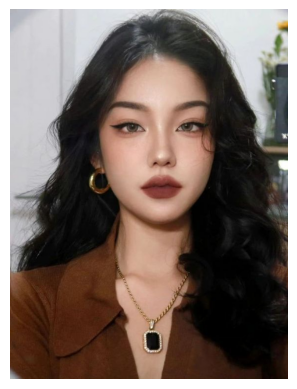

In [2]:
# img = cv.imread('C:/Users/home/Documents/GitHub/AI_image_processing/photos/people/67f4956214dfe90e77953ba6b32b0786.jpg')
img = cv.imread('C:/Users/home/Documents/GitHub/AI_image_processing/photos/people/592e93e7c7bc9ff16dca5542b07f476f.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')

### 4.2. Перетворення зображення у grayscale для коректної роботи алгоритму Haar Cascade.

(np.float64(-0.5), np.float64(562.5), np.float64(749.5), np.float64(-0.5))

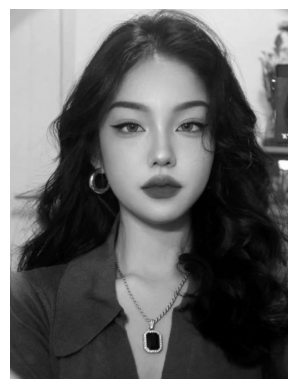

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')

### 4.3. Завантаження каскадного класифікатора та виявлення облич

In [4]:
face_cascade = cv.CascadeClassifier('C:/Users/home/Documents/GitHub/AI_image_processing/haarcascade/haarcascade_frontalface_default.xml')
people_rects = face_cascade.detectMultiScale(gray, 1.2, 7)

print(f"People: {len(people_rects)}")
people_rects

People: 1


array([[157, 123, 298, 298]], dtype=int32)

Відображення результатів детекції

(np.float64(-0.5), np.float64(562.5), np.float64(749.5), np.float64(-0.5))

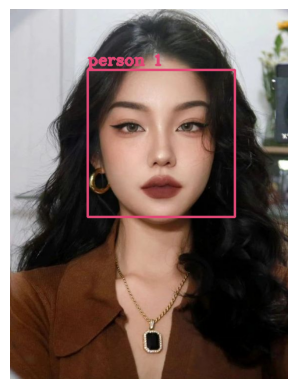

In [5]:
for index, (x, y, w, h) in enumerate(people_rects):
    cv.rectangle(img_rgb, (x,y), (x+w, y+h), (225, 71, 117), 4)
    cv.putText(img_rgb, f'person {index + 1}', (x, y-10), cv.FONT_HERSHEY_COMPLEX, 1, (225, 71, 117), 3)

plt.imshow(img_rgb)
plt.axis('off')

Ініціалізація каскадних класифікаторів

In [6]:
eye_cascade = cv.CascadeClassifier('C:/Users/home/Documents/GitHub/AI_image_processing/haarcascade/haarcascade_eye.xml')
smile_cascade = cv.CascadeClassifier('C:/Users/home/Documents/GitHub/AI_image_processing/haarcascade/haarcascade_smile.xml')

### 4.4 Обробка знайдених людей на зображенні з детекцією очей та посмішки

people: 1
eyes: 2
smiles: 1


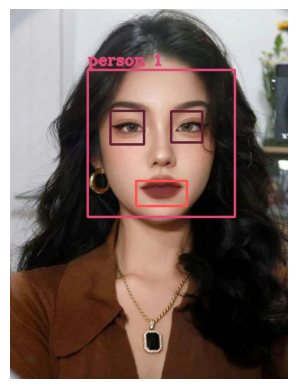

In [7]:
for index, (x, y, w, h) in enumerate(people_rects):
    roi = gray[y : y + h, x : x + w]
    roi_rgb = img_rgb[y : y + h, x : x + w]

    cv.rectangle(img_rgb, (x,y), (x+w, y+h), (225, 71, 117), 4)
    cv.putText(img_rgb, f'person {index + 1}', (x, y-10), cv.FONT_HERSHEY_COMPLEX, 1, (225, 71, 117), 3)
    
    eye_rects = eye_cascade.detectMultiScale(roi, 1.3, 9)
    smile_rects = smile_cascade.detectMultiScale(roi, 1.3, 13)
    
    for xe, ye, we, he in eye_rects:
        cv.rectangle(roi_rgb, (xe, ye), (xe + we, ye + he), (97, 30, 50), 3)
    
    for xs, ys, ws, hs in smile_rects:
        cv.rectangle(roi_rgb, (xs, ys), (xs + ws, ys + hs), (255, 80, 80), 3)

plt.imshow(img_rgb)
plt.axis('off')

print(f"people: {len(people_rects)}")
print(f"eyes: {len(eye_rects)}")
print(f"smiles: {len(smile_rects)}")

Ініціалізація HOG-дескриптора

In [8]:
hog = cv.HOGDescriptor()
hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector())

### 4.5. Виявлення людей на відео

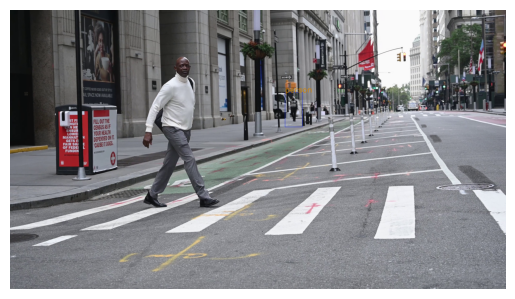

In [9]:
capture = cv.VideoCapture('C:/Users/home/Documents/GitHub/AI_image_processing/photos/fullbody/5631765-uhd_3840_2160_24fps.mp4')

try:
    while capture.isOpened():
        ret, frame = capture.read()
        if ret == False:
            break

        frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        people, weights = hog.detectMultiScale(frame_gray, winStride=(8,8), padding=(32,32), scale=1.2)

        if len(people) > 0:
            for x, y, w, h in people:
                cv.rectangle(frame_rgb, (x,y), (x+w, y+h), (34, 53, 223), 2)
                cv.putText(frame_rgb, 'person', (x,y), cv.FONT_HERSHEY_SIMPLEX, 2, (210, 130, 1), 3)
        
        plt.imshow(frame_rgb)
        plt.axis('off')
        display(plt.gcf())
        clear_output(wait=True)
        plt.close()
        
except KeyboardInterrupt:
    pass

capture.release()

## Висновки 

У даній лабораторній роботі було виконано завантаження та попередню обробку зображення, використання каскадного класифікатора Haar для виявлення облич з локальною детекцією очей та посмішки та візуалізацію результатів детекції. Також було реалізовано обробку відеопотоку в реальному часі з детекцію людей за допомогою HOG. Отримані результати демонструють ефективність класичних методів комп’ютерного зору для задач детекції об’єктів без використання нейронних мереж.